<a href="https://colab.research.google.com/github/karla-sm/M-dulo-II-Diplomado-TEyMD/blob/main/15_03_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Variables aleatorias discretas**
# Variable uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_1,..., x_n\}$ si su función de densidad está dada por:
$$ f_X(x) = \mathbb{P}(X=x)= \begin{cases} \frac{1}{n}, \quad \text {si } x\ in \{x_1,...,x_n\}\\ 0, \quad \text{e.o.c} \end{cases} $$
Se llama unifroem porque cada uno de sus posibles resultados de $X$ tiene la misma probabilidad.
**Notación:** $X\sim Unif(x_1,...,x_n)$
La esperanza y varianza de $X$ están dadas por:
$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$
y
$$ \text{Var}(X) = \mathbb{E}\left[(X-\mathbb{E}[X])^2\right] = \frac{(x_n -x_1 +1)^2 -1}{12}$$

Eejercicio 1: Verifica  la esperanza y varianza de una v.a. uniforme


In [1]:
import numpy as np

In [3]:
import numpy.random as npr #Para generar números aleatorios
import scipy.stats as sps
from scipy.stats import randint #Para trabajar una uniforme discreta
import matplotlib.pyplot as plt
import random

**Ejemplo** Se lleva a cabo una rifa donde los boletos están enumerados del $00$ al $99$. Si $Y$ es la variable aleatoria definida como el número del boleto ganador, entonces:  
$$\mathbb{P}(Y=k)=\begin{cases}
	\frac{1}{100} &\quad \text{si } k=00,01,\dots,99 \\
	0 &\quad \text{en otro caso}
\end{cases}$$
Consideremos que el premio de la rifa se determina a partir del número premiado de la siguiente forma: $X=Y+1$, donde $X$ es el monto del premio en pesos y $Y$ es el número premiado, entonces $X$ es una variable aleatoria, pues es una función de $Y$, y además se tiene
	$$f_{X}(k)=\begin{cases}
		\frac{1}{100} &\quad \text{si } x=1,2,\dots,100 \\
		0 &\quad \text{en otro caso}
	\end{cases}$$
  $\color{red} {\text {Ejercicio 2. }}$ Calcular la esperanza y varianza.

  Supongamos que nos interesa calcular la probabilidad de que el premio sea mayor a $\$80$, entonces:
  $$\mathbb{P}(X>80) = \sum_{k=81}^{100} \frac{1}{100} = \frac{20}{100} = 0.2$$
  La función de distribución de una v.a uniforme es:
  $$ F_X(x) = \mathbb{P}(X\le x) = \begin{cases} 0 \quad \text{si } x < x_1 \\ \frac{x}{n}, \quad \text{si } x \in \{x_1,...,x_n\}\\ 1, \quad \text{si } x > x_n \end{cases}$$

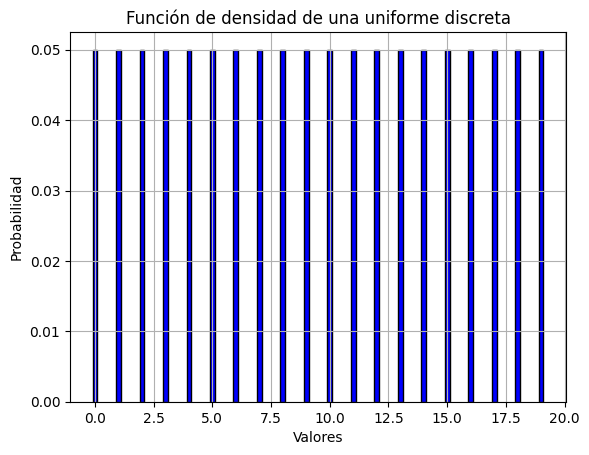

In [7]:
#Definir el rango de la distribución uniforme discreta
low = 0 #Límite inferior
high = 20 # Límite superior

x = np.arange(low, high)

#Calcular la funicón de masa de probabilidad/densidad
pmf = np.full_like(x, 1/(high-low) , dtype = float)

#Graficar pmf
plt.bar(x, pmf, width=0.2, color='b', edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una uniforme discreta')
plt.grid(True)
plt.show() #Mostrar el gráfico



# **Variable aleatoria Bernoulli con parámetro $p\in (0,1)$**


Este modelo se aplica a un experimento cuyo espacio muestral tiene dos resultados:
$$ \Omega = \{\text{éxito} , \text{fracaso}\}$$
y definimos:
* $X (\{\text{Éxito}\})=1$
* $ X(\{\text{Fracaso}\})=0$
Las probabilidades asociadas a este modelo son:
* $\mathbb{P}(\{\text{Éxito}\})=p$
* $\mathbb{P}(\{\text{Fracaso}\})=p-1$\
Donde $0<p<1$.\
La función de densidad está definida de la siguiente manera.
$$ f_X(x) = \mathbb{P}(X=x)= \begin{cases} p^x(1-p)^{1-x}, \quad \text {si } x\in \{0,1\}\\ 0, \quad \text{e.o.c} \end{cases} $$ \



**Notación:** $X\sim Ber(p)$

Mediante la combinación de v.a. Bernoulli es posible construir otras v.a.\
La esperanza y varianza de $X\sim Ber(p)$ está dada por:
$$ \mathbb{E}[X] = \sum_{x=0}^{1} xf_{X}(x) = 0\cdot (1-p)+1 \cdot p = p$$
y
$$ \mathbb{E}[X^2] = \sum_{x=0}^{1} x^2 f_{X}(x) = 0^2 \cdot (1-p) + 1^2 \cdot p= p$$
entonces:
$$ \text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 = p-p^2 = p(1-p)$$

In [8]:
from scipy.stats import bernoulli

#Definimos nuestra probabilidad de éxito
p=0.3
x = [0,1] #Defino los posibles valores

#Calculamos la función de densidad
pmf = bernoulli.pmf(x, p)
print("La función de densidad = ", pmf)

La función de densidad =  [0.7 0.3]


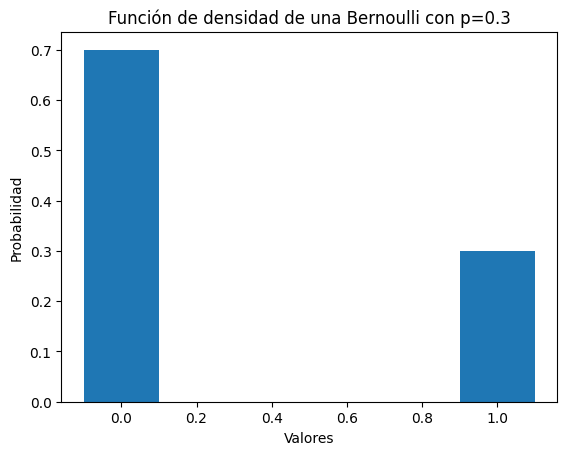

In [10]:
#Graficamos la pmf
plt.bar(x,pmf, width=0.2)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una Bernoulli con p=0.3')
#plt.grid(True)
plt.show() #Mostrar el gráfico

In [11]:
#Cálculo de la esperanza
print("La esperanza es =", bernoulli.mean(p))

#Cálculo de la varianza
print("La varianza es =", bernoulli.var(p))

La esperanza es = 0.3
La varianza es = 0.21


# **Variable aleatoria Binomial con parámetros $n$ y $p \in (0,1)$**

Decimos que una v.a. $X$ tiene distribución binomial con parámetros $n$ y $p$ si su función de densidad está dada por:
$$ f_X(x) = \mathbb{P}(X=x)= \begin{cases} \binom{n}{x}p^x (1-p)^{n-x}, \quad \text {si } x\in \{0,1,...,n\}\\ 0, \quad \text{e.o.c} \end{cases} $$ \
donde $n\in \mathbb{Z}_{+}$ y $0<p<1$

La esperanza está dada por:
$$\mathbb{E}[X]= np$$
y $$\text{Var}(X) = np(1-p)$$

**Obs:** Los ensayos deben ser independientes.

**Ejemplo:** Una moneda justa se tira 6 veces, donde la probabilidad de obtener sol es de $0.3$. Sea $X$ el número de
sabemos que $X$ tiene una distribución binomial con parámetros $n=6$ y $p=0.3$. Calcular:
- $\mathbb{P}(X=2) = \binom{6}{2}(0.3)^2 (1-p)^{6-4} = 0.3241$
- $\mathbb{P}(X=3) = \binom{6}{3}(0.3)^2 (1-p)^{6-3} = 0.1852$
- $$ \begin{align*}\mathbb{P}(1<X \le 5)& = \mathbb{P}(X=2) + \mathbb{P}(X=3) + \mathbb{P}(X=4) + \mathbb{P}(X=5)\\ &=0.3241 + 0.1852 + \binom{6}{4}(0.3)^4(1-p)^{6-4} + \binom{6}{5}(0.3)^5(1-p)^{6-5}\\ &= 0.579\end{align*}$$

Notemos que $\mathbb{P}(1<X\le 5)= F_X(5)- F_X(1)$

Usamos el atributo .cdf para calcular estas probabilidades

In [15]:
from scipy.stats import binom
binom.cdf(5,6,0.3) #Calcula la probabilidad acumulada de que haya 5 o menos éxitos en 6 ensayos
binom.cdf(1,6,0.3) #Calcula la probabilidad acumulada de que haya 1 o menos éxitos en 6 ensayos
binom.cdf(5,6,0.3) -binom.cdf(1,6,0.3) #Calcula la probabilidad deseada

0.5790960000000003

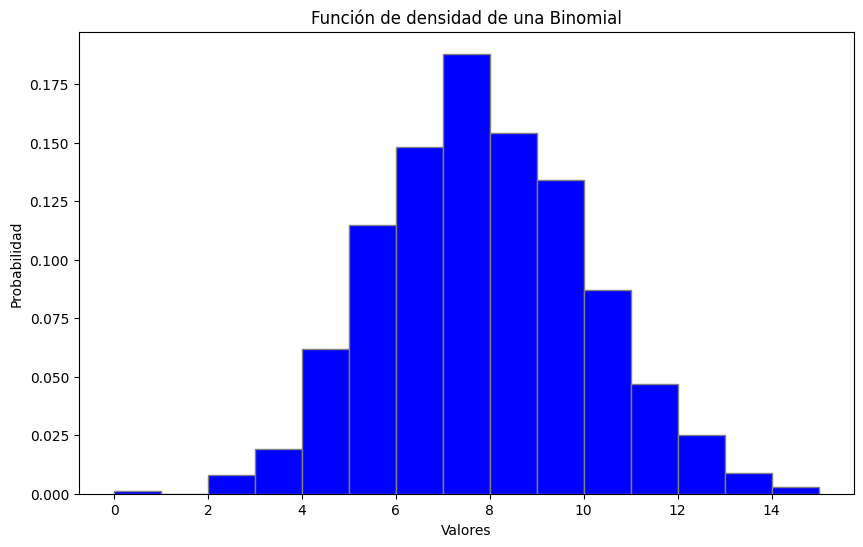

In [14]:
n=25 #es el núm de ensayos Bernoulli
p=0.3 # Prob de éxito
s= 1000 #Núm de muestras

#Generar núm aleatorios con dist. binomial
binom_numeros = sps.binom.rvs(n, p, size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    binom_numeros,
    density=True, #Normaliza el área para que sea 1
    bins = len(np.unique(binom_numeros)), #Núm de barras del hist
    color = "blue",
    edgecolor = "grey"
)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una Binomial')
#plt.grid(True)
plt.show() #Mostrar el gráfico

# **Variable aleatoria Poisson**

Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventosraros durante un intervalo dado (puede ser tiempo, longitud, área, etc.)\
Esta v.a. toma valores sobre el conjunto $\{0,1,2,3,...,\}$ y tiene un parámetro $\lambda >0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.\
Su función de densidad está dada por:
$$ f_X(x) = \mathbb{P}(X=x)= \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text {si } x\in \{0,1,...\}\\ 0, \quad \text{e.o.c} \end{cases} $$ \
Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda.$


**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto tiene distribución Poisson con parámetro $\lambda=2$,
- ¿Cuál es la probabilidad dr que en un día ocurran más de 2 accidentes?
$$ \begin{align*} \mathbb{P}(X>2)=
&= 1-\mathbb{P}(X\le2)\\
&= 1-[\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)]\\
&= 1-\left[ e^{-2}[1+2+2] = 1-5e{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!}\right]\\
&= 1-e^{-2}{1+2+2} = 1-5e^{-2} = 0.3233
 \end{align*}$$
- ¿Cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1)
  &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
  &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
  & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
  \end{align*} $$

  **Ejercio 3** Usando el atributo .cdf  caclula las probabilidades anteriores

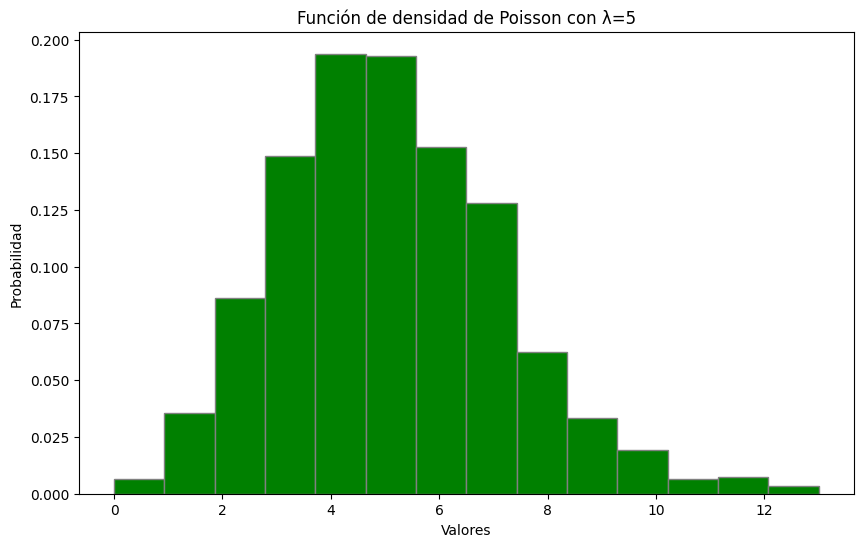

In [25]:
lambda_poisson = 5  # Tasa promedio de ocurrencia (ajusta según sea necesario)
s = 1000  # Número de muestras

np.random.seed(3)  # Para reproducibilidad

# Generamos números aleatorios que siguen una distribución de Poisson
poisson_numeros = sps.poisson.rvs(mu=lambda_poisson, size=s)

# Creamos un histograma
plt.figure(figsize=(10, 6))
plt.hist(
    poisson_numeros,
    density=True,  # Normaliza el área para que sea 1
    bins=len(np.unique(poisson_numeros)),  # Número de barras del histograma
    color="green",
    edgecolor="grey"
)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title(f'Función de densidad de Poisson con λ={lambda_poisson}')
plt.show()  # Mostrar el gráfico

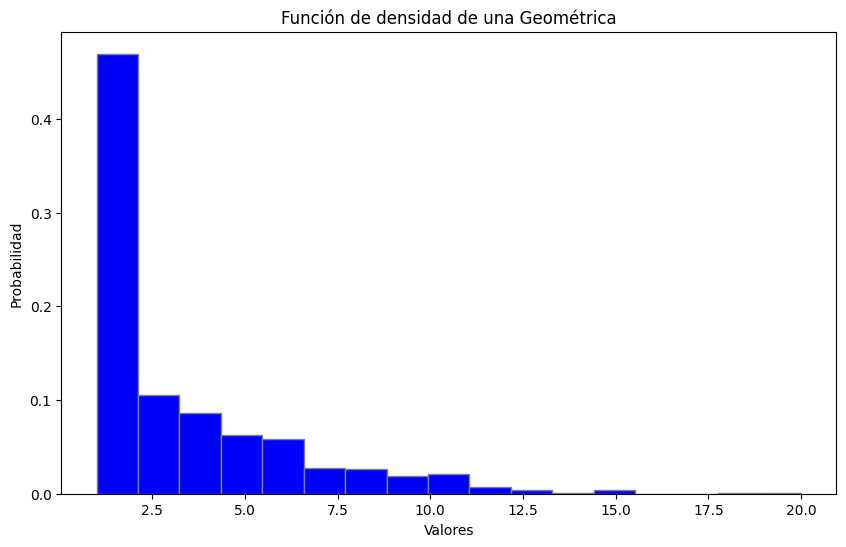

In [21]:
p = 0.3 #Probabilidad de éxito
s =1000 #Núm de muestras

random.seed(3)
#Vamos a generar números aleatorios que siguen una dist binomial
geom_numeros = sps.geom.rvs(p,size=s)


#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    geom_numeros,
    density=True, #Normaliza el área para que sea 1
    bins = len(np.unique(geom_numeros)), #Núm de barras del hist
    color = "blue",
    edgecolor = "grey"
)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una Geométrica')
#plt.grid(True)
plt.show() #Mostrar el gráfico


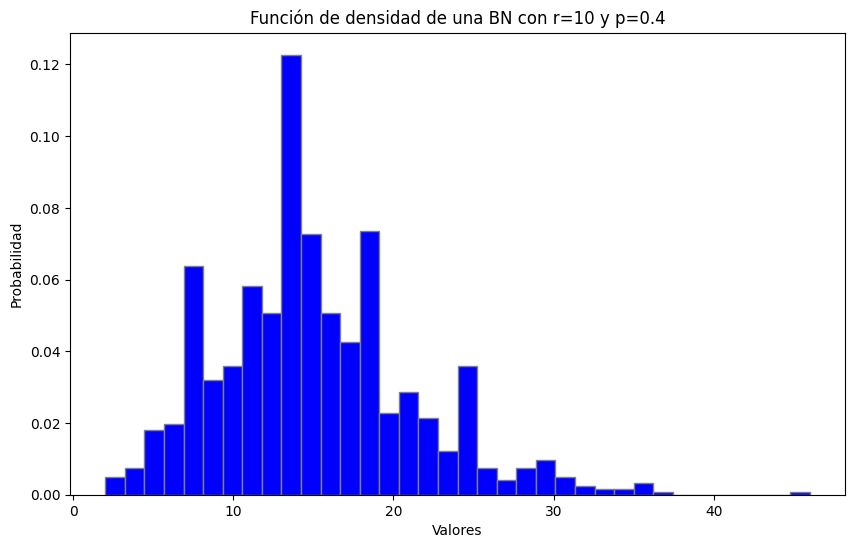

In [20]:
r=10
p = 0.4 #Probabilidad de éxito
s =1000 #Núm de muestras

random.seed(3)
#Vamos a generar números aleatorios que siguen una dist binomial
nbinom_numeros = sps.nbinom.rvs(r,p,size=s)


#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    density=True, #Normaliza el área para que sea 1
    bins = len(np.unique(nbinom_numeros)), #Núm de barras del hist
    color = "blue",
    edgecolor = "grey"
)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una BN con r=10 y p=0.4')
#plt.grid(True)
plt.show() #Mostrar el gráfico


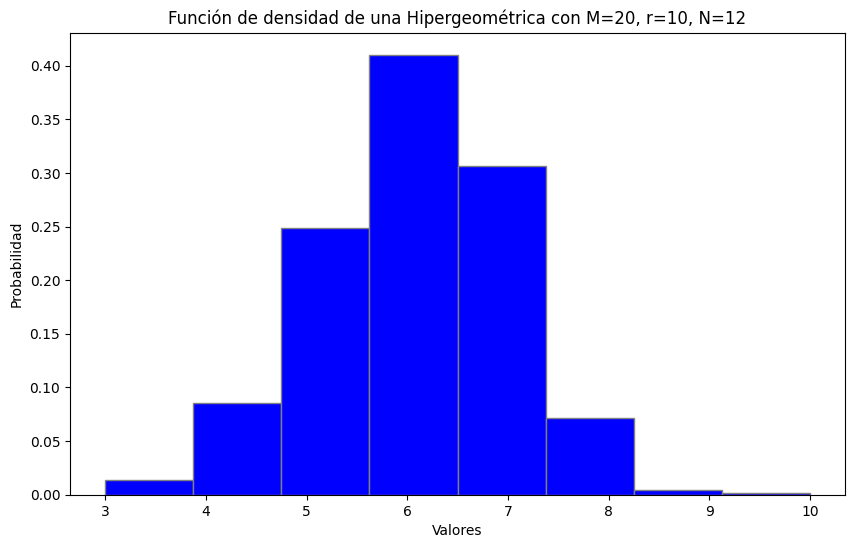

In [24]:
M = 20  # Tamaño total de la población (ajusta según sea necesario)
r = 10  # Número de éxitos en la población
N = 12  # Tamaño de la muestra (ajusta según sea necesario)
s = 1000  # Número de muestras

np.random.seed(3)  # Usamos np.random.seed para la reproducibilidad

# Generamos números aleatorios que siguen una distribución hipergeométrica
hipergeom_numeros = sps.hypergeom.rvs(M, r, N, size=s)

# Creamos un histograma
plt.figure(figsize=(10, 6))
plt.hist(
    hipergeom_numeros,
    density=True,  # Normaliza el área para que sea 1
    bins=len(np.unique(hipergeom_numeros)),  # Número de barras del histograma
    color="blue",
    edgecolor="grey"
)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title(f'Función de densidad de una Hipergeométrica con M={M}, r={r}, N={N}')
plt.show()  # Mostrar el gráfico